In [1]:
import os
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [3]:
#first read winter and summer data
dfjan = pd.read_csv('201501-citibike-tripdata.csv')
dffeb = pd.read_csv('201502-citibike-tripdata.csv')
dfmar = pd.read_csv('201503-citibike-tripdata.csv')

dfjun = pd.read_csv('201506-citibike-tripdata.csv')
dfjul = pd.read_csv('201507-citibike-tripdata.csv')
dfaug = pd.read_csv('201508-citibike-tripdata.csv')


In [4]:
frames = [dfjan, dffeb, dfmar]
dfwin = pd.concat(frames)
frames = [dfjun, dfjul, dfaug]
dfsum = pd.concat(frames)

In [6]:
#get age data
ageW = (2015-dfwin['birth year'][(dfwin['usertype'] == 'Subscriber')])
ageS = (2015-dfsum['birth year'][(dfsum['usertype'] == 'Subscriber')])
dfw = pd.DataFrame({'age': []})
dfs = pd.DataFrame({'age': []})
dfw['age'] = ageW
dfs['age'] = ageS

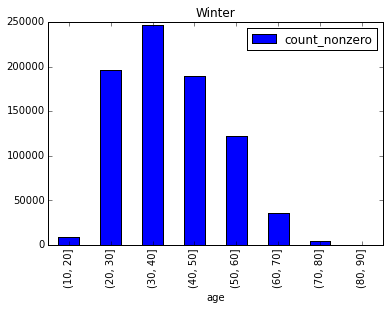

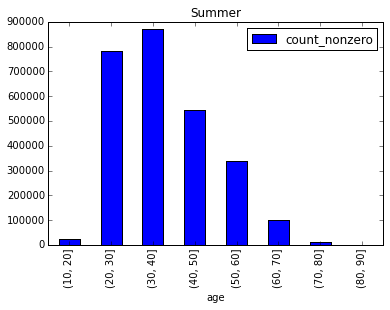

In [7]:
bins = np.arange(10, 99, 10)
dfw.age.groupby(pd.cut(dfw.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = dfw.age.groupby(pd.cut(dfw.age, bins)).agg([count_nonzero])
dfs.age.groupby(pd.cut(dfs.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = dfs.age.groupby(pd.cut(dfs.age, bins)).agg([count_nonzero])
    

In [ ]:
#the two graphs look the same because of the large sample size

In [8]:
#compare to normal

ksW=scipy.stats.kstest(W_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

#compare to poisson 

ksW=scipy.stats.kstest(W_age_dist, 'cauchy')
ksS=scipy.stats.kstest(S_age_dist, 'cauchy')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)
winter, normal fit (0.99999871000078544, 0.0)
summer, normal fit (0.99999963442994877, 0.0)


In [9]:
ksW=scipy.stats.kstest(W_age_dist, 'gamma', args=(35,))
ksS=scipy.stats.kstest(S_age_dist, 'gamma', args=(35,))

print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)


In [10]:
def mydistribution(size, m0, m1):
    #this is a crazy dumb function, but i am trying to make a point here...
    return (np.empty_like(size)+1) * m0 **2
ksW=scipy.stats.kstest(W_age_dist, mydistribution, args=(35,38))
ksS=scipy.stats.kstest(S_age_dist, mydistribution, args=(35,38))

print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (1066635675.0, nan)
summer, normal fit (302272425.0, nan)


In [ ]:
#the p-values returned from KS test is 0, which indicates that we reject H0, the normal distribution cannot fit citibike data

In [18]:
#TD test
print "winter, normal", scipy.stats.anderson(dfw.age[~np.isnan(dfw.age)], dist= 'norm')
print "summer, normal", scipy.stats.anderson(dfs.age[~np.isnan(dfs.age)], dist='norm')

 winter, normal (7803.3432560021756, array([ 0.576,  0.656,  0.787,  0.918,  1.092]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
summer, normal (41623.785302417353, array([ 0.576,  0.656,  0.787,  0.918,  1.092]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [19]:
print "winter, expon", scipy.stats.anderson(dfw.age[~np.isnan(dfw.age)], dist= 'expon')
print "summer, expon", scipy.stats.anderson(dfs.age[~np.isnan(dfs.age)], dist='expon')

winter, expon (187469.8913656841, array([ 0.922,  1.078,  1.341,  1.606,  1.957]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
summer, expon (626146.29325786, array([ 0.922,  1.078,  1.341,  1.606,  1.957]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [21]:
print "winter, log", scipy.stats.anderson(dfw.age[~np.isnan(dfw.age)], dist= 'logistic')
print "summer, log", scipy.stats.anderson(dfs.age[~np.isnan(dfs.age)], dist='logistic')

 winter, log (8242.6839155299822, array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))
summer, log (38453.292343733832, array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))


In [ ]:
#as we can see, the critical values returned from TD test is large and it indicates that we reject H0
#so neither normal, expon, or log distributions fit citibike data